In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm

In [2]:
def natErr(p, a, b, c, d):
    return (
        0.5 * p       * a
      + 0.5 * (1 - p) * b
      + 0.5 * (1 - p) * (1 - c)
      + 0.5 * p       * (1 - d)
    )

def advErr(p, a, b, c, d):
    return (
        0.5 * p       * np.maximum(a, c)
      + 0.5 * (1 - p) * np.maximum(b, d)
      + 0.5 * (1 - p) * np.maximum(1 - a, 1 - c)
      + 0.5 * p       * np.maximum(1 - b, 1 - d)
    )

def natAdvErrs(p, a, b, c, d):
    return np.stack((
        natErr(p, a, b, c, d),
        advErr(p, a, b, c, d)
    ), axis=-1)

natAdvErrs(0.6, 0, 0, 1, 1), natAdvErrs(0.6, 1, 1, 0, 0)

(array([0., 1.]), array([1., 1.]))

CPU times: user 30.6 ms, sys: 3.51 ms, total: 34.1 ms
Wall time: 33.1 ms


(0.0, 1.0)

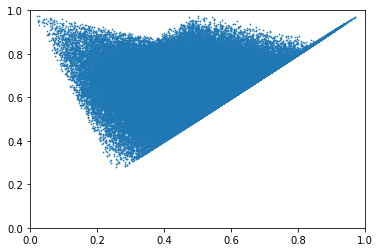

In [3]:
%%time
np.random.seed(42)

P = 0.75
NUM_SAMPLES = 10 ** 5

abcds = np.random.random((NUM_SAMPLES, 4))
pts = natAdvErrs(P, *(abcds[:, _] for _ in range(4)))

plt.scatter(x=pts[:, 0], y=pts[:, 1], s=0.5);
plt.xlim(0, 1);
plt.ylim(0, 1);

CPU times: user 24.1 ms, sys: 2.92 ms, total: 27.1 ms
Wall time: 25.7 ms


(0.0, 1.0)

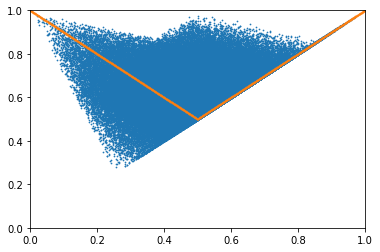

In [4]:
%%time
P = .75

abcds_int = np.linspace(
    start=[0, 0, 1, 1],
    stop=[1, 1, 0, 0],
    num=1000
)
pts_int = natAdvErrs(P, *(abcds_int[:, _] for _ in range(4)))

plt.scatter(x=pts[:, 0], y=pts[:, 1], s=0.5);
plt.scatter(x=pts_int[:, 0], y=pts_int[:, 1], s=0.5);
plt.xlim(0, 1);
plt.ylim(0, 1);